In [1]:
%matplotlib inline


# 1D Wasserstein barycenter comparison between exact LP and entropic regularization


This example illustrates the computation of regularized Wasserstein Barycenter
as proposed in [3] and exact LP barycenters using standard LP solver.

It reproduces approximately Figure 3.1 and 3.2 from the following paper:
Cuturi, M., & Peyré, G. (2016). A smoothed dual approach for variational
Wasserstein problems. SIAM Journal on Imaging Sciences, 9(1), 320-343.

[3] Benamou, J. D., Carlier, G., Cuturi, M., Nenna, L., & Peyré, G. (2015).
Iterative Bregman projections for regularized transportation problems
SIAM Journal on Scientific Computing, 37(2), A1111-A1138.






Elapsed time : 0.010513782501220703 s
Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1700.336700337      
0.006776453137632   0.006776453137633   0.006776453137633   0.9932238647293  0.006776453137633   125.6700527543      
0.004018712867874   0.004018712867874   0.004018712867874   0.4301142633     0.004018712867874   12.26594150093      
0.001172775061627   0.001172775061627   0.001172775061627   0.7599932455029  0.001172775061627   0.3378536968897     
0.0004375137005385  0.0004375137005385  0.0004375137005385  0.6422331807989  0.0004375137005385  0.1468420566358     
0.000232669046734   0.0002326690467341  0.000232669046734   0.5016999460893  0.000232669046734   0.09381703231432    
7.430121674303e-05  7.430121674303e-05  7.430121674303e-05  0.7035962305812  7.430121674303e-05  0.0577787025717     
5.321227838876e-05 

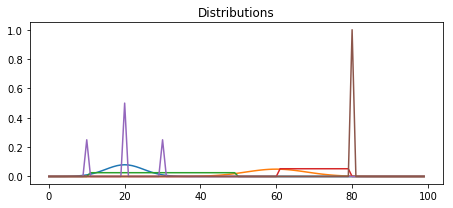

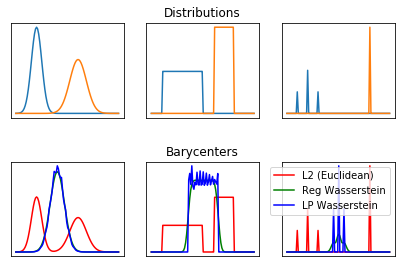

In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection  # noqa

#import ot.lp.cvx as cvx

#
# Generate data
# -------------

#%% parameters

problems = []

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

#
# Plot data
# ---------

#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

#
# Barycenter computation
# ----------------------

#%% barycenter computation

alpha = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
ot.tic()
bary_wass = ot.bregman.barycenter(A, M, reg, weights)
ot.toc()


ot.tic()
bary_wass2 = ot.lp.barycenter(A, M, weights, solver='interior-point', verbose=True)
ot.toc()

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Reg Wasserstein')
pl.plot(x, bary_wass2, 'b', label='LP Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

problems.append([A, [bary_l2, bary_wass, bary_wass2]])

#%% parameters

a1 = 1.0 * (x > 10) * (x < 50)
a2 = 1.0 * (x > 60) * (x < 80)

a1 /= a1.sum()
a2 /= a2.sum()

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()


#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

#
# Barycenter computation
# ----------------------

#%% barycenter computation

alpha = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
ot.tic()
bary_wass = ot.bregman.barycenter(A, M, reg, weights)
ot.toc()


ot.tic()
bary_wass2 = ot.lp.barycenter(A, M, weights, solver='interior-point', verbose=True)
ot.toc()


problems.append([A, [bary_l2, bary_wass, bary_wass2]])

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Reg Wasserstein')
pl.plot(x, bary_wass2, 'b', label='LP Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

#%% parameters

a1 = np.zeros(n)
a2 = np.zeros(n)

a1[10] = .25
a1[20] = .5
a1[30] = .25
a2[80] = 1


a1 /= a1.sum()
a2 /= a2.sum()

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()


#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

#
# Barycenter computation
# ----------------------

#%% barycenter computation

alpha = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
ot.tic()
bary_wass = ot.bregman.barycenter(A, M, reg, weights)
ot.toc()


ot.tic()
bary_wass2 = ot.lp.barycenter(A, M, weights, solver='interior-point', verbose=True)
ot.toc()


problems.append([A, [bary_l2, bary_wass, bary_wass2]])

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Reg Wasserstein')
pl.plot(x, bary_wass2, 'b', label='LP Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()


#
# Final figure
# ------------
#

#%% plot

nbm = len(problems)
nbm2 = (nbm // 2)


pl.figure(2, (20, 6))
pl.clf()

for i in range(nbm):

    A = problems[i][0]
    bary_l2 = problems[i][1][0]
    bary_wass = problems[i][1][1]
    bary_wass2 = problems[i][1][2]

    pl.subplot(2, nbm, 1 + i)
    for j in range(n_distributions):
        pl.plot(x, A[:, j])
    if i == nbm2:
        pl.title('Distributions')
    pl.xticks(())
    pl.yticks(())

    pl.subplot(2, nbm, 1 + i + nbm)

    pl.plot(x, bary_l2, 'r', label='L2 (Euclidean)')
    pl.plot(x, bary_wass, 'g', label='Reg Wasserstein')
    pl.plot(x, bary_wass2, 'b', label='LP Wasserstein')
    if i == nbm - 1:
        pl.legend()
    if i == nbm2:
        pl.title('Barycenters')

    pl.xticks(())
    pl.yticks(())